In [1]:
using DelimitedFiles, Plots, Statistics

In [2]:
using CurveFit

# read 1 run

In [121]:
path = "tmp_stab/res_epid_stab/"

"tmp_stab/res_epid_stab/"

TIT = "T=8, λ=1.0, γ=0.0183, N=50000"
namefile = "tmp_stab/res_epid_stab/gam0.0183/fileres_epid_stab_T8_LAM1.0_GAM0.0183_N50000_iter500_run109"
iter_full[end] = 500


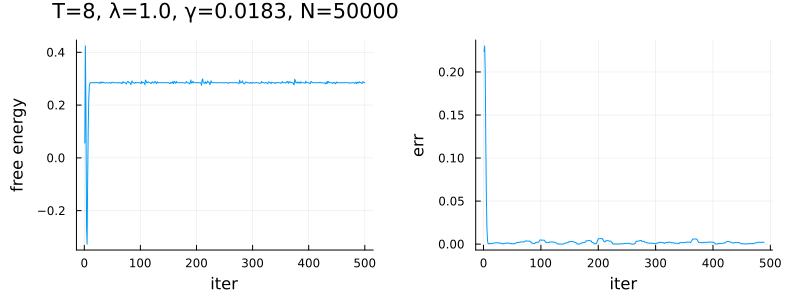

In [143]:
extension= "_run109"
#extension = ""
T=8
LAM=1.0
GAM=0.0183
N=50000
iter=500

TIT = "T="*string(T)*", λ="*string(LAM)*", γ="*string(GAM)*", N="*string(N)
@show TIT
foldergam="gam"*string(GAM)*"/"
nameparams="T"*string(T)*"_LAM"*string(LAM)*"_GAM"*string(GAM)*"_N"*string(N)*"_iter"*string(iter)

namefile = path*foldergam*"fileres_epid_stab_"*nameparams*extension
@show namefile
file = readdlm(namefile);
res = file[3:end,1:4];

iter_full=findall(.!isnan.(res[:,1]));
@show iter_full[end]

pF=plot(xaxis="iter", yaxis="free energy", title=TIT);
plot!(pF,res[iter_full,3], label="")

perr = plot(xaxis="iter", yaxis="err");
plot!(perr, res[iter_full[12:end],2], label="")

plot(pF, perr, layout=(1,2), size=(800,300), margin=5*Plots.mm)

halfiter = 252
res[iter_Δ[end], 4] = 5.369503839884498e-41
sfitΔ = 0.6877000973997921


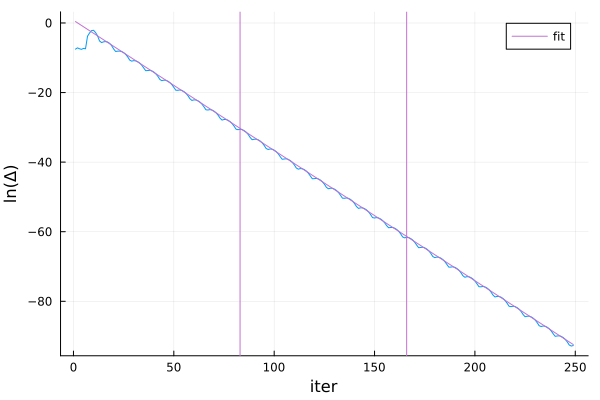

In [144]:
halfiter=Int64(iter/2)+2
@show halfiter

iter_Δ = findall([(!isinf(res[j,4])&&!isnan(res[j,4])) for j in iter_full])
@show  res[iter_Δ[end],4]
log_Δ = log.(res[iter_Δ[halfiter:end],4])
pΔ = plot(xaxis="iter", yaxis="ln(Δ)");
plot!(pΔ, log_Δ, label="")

if res[iter_Δ[end],4] < 1
    ratio_Δ = [abs(res[i,4]/res[i-1,4]) for i in iter_Δ[halfiter:end]]
    frac_cut = 3
    lsta = Int64(round(length(ratio_Δ)/frac_cut))
    lend = length(ratio_Δ)-lsta
    lmid=Int64(round((lend+lsta)/2))
    vline!(pΔ, [lsta], color=4, label="")
    vline!(pΔ, [lend], color=4, label="")

    #geometrical mean
    gmΔ = prod(ratio_Δ[lsta:lend])^(1/length(lsta:lend))
    #@show gmΔ
    diff = log(gmΔ)*lmid - log_Δ[lmid] 
    #plot!(pΔ, log(gmΔ).*(1:length(ratio_Δ)).-diff, label="")
    
    #linear fit
    log_Δ_cut = log_Δ[lsta:lend]
    (a,b)=linear_fit(lsta:lend, log_Δ_cut)
    sfitΔ = exp(b)
    @show sfitΔ
    diff_fit = b*lmid - log_Δ[lmid]  
    plot!(pΔ, b.*(1:length(ratio_Δ)).-diff_fit, label="fit")

    pratio = plot();
    plot!(pratio,ratio_Δ)
    hline!(pratio, [gmΔ], label="geo mean")
    vline!(pratio, [lsta], color=4, label="")
    vline!(pratio, [lend], color=4, label="")

    plot(pΔ)#, pratio, layout=(1,2), size=(800,300), margin=5*Plots.mm)
else
    gmΔ=Inf
    plot(pΔ)
end

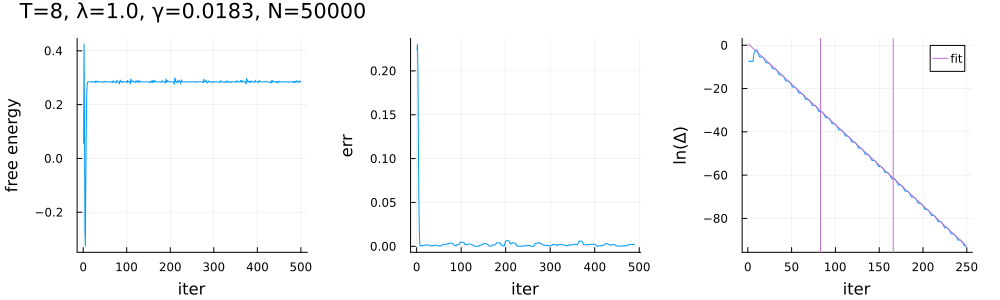

In [145]:
p1run = plot(pF, perr, pΔ, layout=(1,3), size=(1000,300), margin=5*Plots.mm)

In [125]:
#savefig(p1run, "freen_err_stab_T"*string(T)*"_λ"*string(LAM)*"_γ"*string(GAM)*"_N"*string(N)*".pdf")

# loop on γ (10 runs per γ)

In [3]:
T=8
LAM=1.0
path = "tmp_stab/res_epid_stab/"
pfits = plot(xaxis="γ", title="stability parameter: T="*string(T)*", λ="*string(LAM));

In [4]:
N=50000
iter=500

500

In [5]:
runs_range = 101:110
γ16 = [0.016, 0.0165, 0.0167, 0.0168]
γ17 = [0.017, 0.0172, 0.0173, 0.0175, 0.0177, 0.0178]
γ18 = [0.018, 0.0181, 0.0182, 0.0183, 0.0185]
γ_range=vcat([0.0155], γ16, γ17, γ18, [0.019, 0.02, 0.021])

19-element Vector{Float64}:
 0.0155
 0.016
 0.0165
 0.0167
 0.0168
 0.017
 0.0172
 0.0173
 0.0175
 0.0177
 0.0178
 0.018
 0.0181
 0.0182
 0.0183
 0.0185
 0.019
 0.02
 0.021

In [6]:
nbruns = length(runs_range)

10

In [7]:
gam_res = zeros(length(γ_range), length(runs_range));
err_res = zeros(length(γ_range), length(runs_range));

In [8]:
for iγ in 1:length(γ_range)
    for irun in 1:length(runs_range)
        run=runs_range[irun]
        GAM=γ_range[iγ]

        foldergam="gam"*string(GAM)*"/"
        nameparams = "_T"*string(T)*"_LAM"*string(LAM)*"_GAM"*string(GAM)*"_N"*string(N)*"_iter"*string(iter)
        extension = "_run"
        namefile = path*foldergam*"fileres_epid_stab"*nameparams*extension*string(run)

        file = readdlm(namefile);
        
        res = file[3:end,1:4]
        iter_full=findall(.!isnan.(res[:,1]))
        halfiter=Int64(iter/2)+2
        iter_Δ = findall([(!isinf(res[j,4])&&!isnan(res[j,4])) for j in iter_full])

        if res[iter_Δ[end],4] < 1
            #linear fit
            ratio_Δ = [abs(res[i,4]/res[i-1,4]) for i in iter_Δ[halfiter:end]]
            frac_cut = 3
            lsta = Int64(round(length(ratio_Δ)/frac_cut))
            lend = length(ratio_Δ)-lsta
            log_Δ = log.(res[iter_Δ[halfiter:end],4])
            log_Δ_cut = log_Δ[lsta:lend]
            (a,b)=linear_fit(lsta:lend, log_Δ_cut)
            sfitΔ = exp(b)
        else
            sfitΔ=Inf
        end
        
        if (run==108 && GAM==0.0183) sfitΔ = Inf end #remove runs with jump in the slope

        err=res[end-1,2]
        err_res[iγ,irun]=err
        #@show GAM, run, err, sfitΔ
        
        gam_res[iγ,irun]=sfitΔ
    end
end

In [9]:
mean_err = zeros(length(γ_range))
std_err = zeros(length(γ_range));
for iγ in 1:length(γ_range)
    γ=γ_range[iγ]
    mean_err[iγ]=mean(err_res[iγ,:])
    std_err[iγ]=std(err_res[iγ,:])
end

In [15]:
permutedims(gam_res)

10×19 Matrix{Float64}:
 Inf        Inf         0.850123   0.831416  …  0.63554   0.567681  0.509293
 Inf         0.902744   0.861454  Inf           0.634477  0.569053  0.508746
 Inf        Inf         0.851928   0.829432     0.635395  0.568571  0.50865
 Inf         0.902816   0.851136   0.83021      0.635916  0.567801  0.508484
 Inf        Inf        Inf         0.830722     0.635467  0.56795   0.509062
 Inf        Inf        Inf         0.829266  …  0.634206  0.56764   0.508799
  0.972545  Inf        Inf        Inf           0.634965  0.568139  0.508814
 Inf        Inf         0.849459   0.829914     0.634667  0.568408  0.509098
  0.962111   0.910097  Inf         0.830856     0.635236  0.568025  0.510173
 Inf        Inf        Inf         0.829662     0.636548  0.568533  0.508632

In [11]:
frac_conv = sum(.!isinf.(gam_res), dims=2)./length(runs_range)
mean_stab = zeros(length(γ_range))
std_stab = zeros(length(γ_range));
for iγ in 1:length(γ_range)
    γ=γ_range[iγ]
    indicesconv=.!isinf.(gam_res[iγ,:])
    @show γ, indicesconv
    mean_stab[iγ]=mean(gam_res[iγ,indicesconv])
    std_stab[iγ]=std(gam_res[iγ,indicesconv])
end

(γ, indicesconv) = (0.0155, Bool[0, 0, 0, 0, 0, 0, 1, 0, 1, 0])
(γ, indicesconv) = (0.016, Bool[0, 1, 0, 1, 0, 0, 0, 0, 1, 0])
(γ, indicesconv) = (0.0165, Bool[1, 1, 1, 1, 0, 0, 0, 1, 0, 0])
(γ, indicesconv) = (0.0167, Bool[1, 0, 1, 1, 1, 1, 0, 1, 1, 1])
(γ, indicesconv) = (0.0168, Bool[1, 1, 1, 1, 1, 1, 0, 0, 0, 1])
(γ, indicesconv) = (0.017, Bool[1, 1, 1, 1, 0, 1, 1, 1, 1, 0])
(γ, indicesconv) = (0.0172, Bool[1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
(γ, indicesconv) = (0.0173, Bool[0, 1, 1, 1, 0, 1, 1, 1, 1, 1])
(γ, indicesconv) = (0.0175, Bool[1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
(γ, indicesconv) = (0.0177, Bool[1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
(γ, indicesconv) = (0.0178, Bool[1, 1, 1, 1, 0, 1, 1, 1, 1, 1])
(γ, indicesconv) = (0.018, Bool[1, 1, 1, 1, 1, 1, 1, 0, 1, 1])
(γ, indicesconv) = (0.0181, Bool[1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
(γ, indicesconv) = (0.0182, Bool[1, 1, 1, 1, 1, 1, 1, 0, 1, 1])
(γ, indicesconv) = (0.0183, Bool[1, 1, 1, 1, 1, 1, 1, 0, 1, 1])
(γ, indicesconv) = (0.0185, Bool[1, 1, 1, 1

In [12]:
hcat(γ_range, mean_stab,std_stab)

19×3 Matrix{Float64}:
 0.0155  0.967328  0.00737751
 0.016   0.905219  0.00422493
 0.0165  0.85282   0.00491798
 0.0167  0.830185  0.00075717
 0.0168  0.821375  0.00146457
 0.017   0.800748  0.000845929
 0.0172  0.782139  0.000712235
 0.0173  0.772935  0.000516044
 0.0175  0.75538   0.000793635
 0.0177  0.737301  0.000724937
 0.0178  0.729219  0.000836892
 0.018   0.711964  0.000845549
 0.0181  0.703807  0.000920449
 0.0182  0.696023  0.000561499
 0.0183  0.687711  0.000743967
 0.0185  0.672027  0.000674383
 0.019   0.635242  0.00069829
 0.02    0.56818   0.000453875
 0.021   0.508975  0.000486742

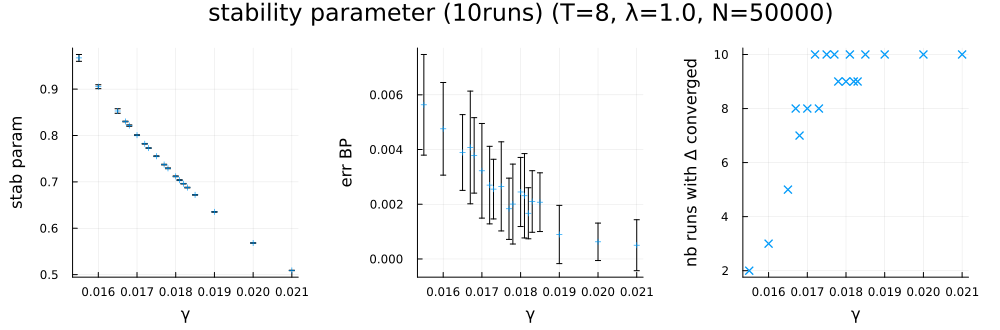

In [13]:
pstab=plot(yaxis="stab param", xaxis="γ")
scatter!(pstab,γ_range,mean_stab, yerr=std_stab, label="", markershape=:+, markerstrokewidth=1, markersize = 3);

pconv=plot(yaxis="nb runs with Δ converged", xaxis="γ")
scatter!(pconv, γ_range,frac_conv.*nbruns, label="", markershape=:x, markerstrokewidth=2);

pTIT="stability parameter ("*string(nbruns)*"runs) (T="*string(T)*", λ="*string(LAM)*", N="*string(N)*")"

perr=plot(yaxis="err BP", xaxis="γ")
scatter!(perr,γ_range,mean_err, yerr=std_err, label="", markershape=:+, markerstrokewidth=1, markersize = 3);

pγ= plot(pstab, perr, pconv, size=(1000,330), layout=(1,3), margin=6*Plots.mm, plot_title=pTIT)

In [14]:
savefig(pγ, "stabav_T"*string(T)*"_λ"*string(LAM)*"_N"*string(N)*".pdf")

"/home/louise/Documents/PostDoc_Turin/Projet-Epidemics/Epidemble/Git/Epidemble_local_copy/stabav_T8_λ1.0_N50000.pdf"

# loop on γ (1 run per γ)

In [8]:
T=8
LAM=1.0
pfits = plot(xaxis="γ", title="stability parameter: T="*string(T)*", λ="*string(LAM));

In [9]:
N=10000
iter=500

500

In [10]:
extension=""

println("#1.γ \t 2.Δ[t=end] \t 3.λ(geometrical mean) \t 3.λ(fit)")
res_nbiter = []
res_finalΔ = []
res_geomean = []
res_fit = []

g18 = [0.018, 0.0181, 0.0182, 0.0183, 0.0184, 0.0185, 0.0186, 0.0188]
g19 = [0.019, 0.0192, 0.0196]
g20 = [0.02, 0.0205, 0.021, 0.022, 0.03]
GAM_range = vcat(g18,g19,g20)

for GAM in GAM_range
    foldergam="gam"*string(GAM)*"/"
    nameparams="T"*string(T)*"_LAM"*string(LAM)*"_GAM"*string(GAM)*"_N"*string(N)*"_iter"*string(iter)
    namefile = path*foldergam*"fileres_epid_stab_"*nameparams*extension
    file = readdlm(namefile);
    res = file[3:end,1:4];

    iter_full=findall(.!isnan.(res[:,1]));
    halfiter=Int64(iter/2)+2
    iter_Δ = findall([(!isinf(res[j,4])&&!isnan(res[j,4])) for j in iter_full])

    log_Δ = log.(res[iter_Δ[halfiter:end],4])

    if res[iter_Δ[end],4] < 1
        #geometrical mean
        ratio_Δ = [abs(res[i,4]/res[i-1,4]) for i in iter_Δ[halfiter:end]]
        frac_cut = 3
        lsta = Int64(round(length(ratio_Δ)/frac_cut))
        lend = length(ratio_Δ)-lsta
        lmid=Int64(round((lend+lsta)/2))
        gmΔ = prod(ratio_Δ[lsta:lend])^(1/length(lsta:lend))

        #linear fit
        log_Δ_cut = log_Δ[lsta:lend]
        (a,b)=linear_fit(lsta:lend, log_Δ_cut)
        sfitΔ = exp(b)
        
    else
        gmΔ=Inf
        sfitΔ = Inf
    end
    println(GAM, "\t", res[iter_Δ[end],4], "\t", gmΔ, "\t", sfitΔ)
    append!(res_nbiter, iter_full[end])
    append!(res_finalΔ, res[iter_Δ[end],4])
    append!(res_geomean, gmΔ)
    append!(res_fit, sfitΔ)
    
end

#1.γ 	 2.Δ[t=end] 	 3.λ(geometrical mean) 	 3.λ(fit)
0.018	8.497011485508832e-39	0.7189856493525384	0.7111523379449993
0.0181	4.1759840329198695e-40	0.705086945302583	0.7043618289693554
0.0182	2.277352339805731e-41	0.6955487635118398	0.6947871364299342
0.0183	7.656816666862583e-43	0.6901516284822115	0.6856855661638491
0.0184	1.8142687334926416e142	Inf	Inf
0.0185	7.731857063825578e-44	0.6726164494188996	0.6706776188252039
0.0186	1.2435900227578738e102	Inf	Inf
0.0188	1.938292082316984e149	Inf	Inf
0.019	3.895655185573393e-51	0.634336264371111	0.6345355822736299
0.0192	4.9398229000080883e-54	0.6202099497576127	0.6204597723327537
0.0196	6.006954074539712e-59	0.5981453071234608	0.5937493612041702
0.02	1.545137173525413e-63	0.5746019898203731	0.5677213141497123
0.0205	3.050622641047261e-69	0.5410685824268788	0.5372358537818017
0.021	1.5730248048930992e-74	0.5049805229496283	0.5095105519919797
0.022	2.9982279803847998e-86	0.45703601043706843	0.4575364127755552
0.03	0.0	0.20665686450488524	0.20

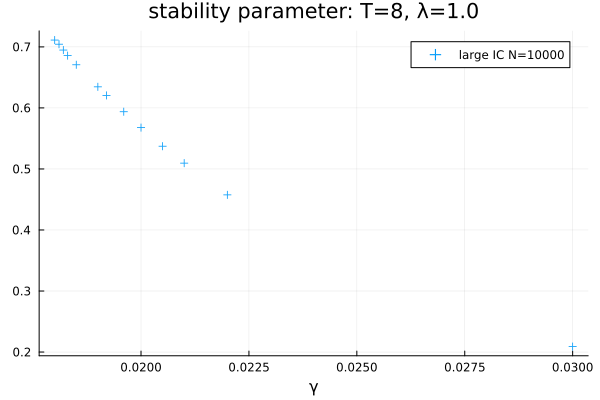

In [11]:
scatter!(pfits, GAM_range, res_fit, label="large IC N="*string(N), markershape=:+, markerstrokewidth=1, markersize = 4)
#scatter!(pfits, GAM_range, res_geomean, label="geo N="*string(N), markershape=:+, markerstrokewidth=2, markersize = 4)

In [12]:
extension="_run101"

println("#1.γ \t 2.Δ[t=end] \t 3.λ(geometrical mean) \t 3.λ(fit)")
res_nbiter_101 = []
res_finalΔ_101 = []
res_geomean_101 = []
res_fit_101 = []

GAM_range_101 = [0.018, 0.0182, 0.0185, 0.019, 0.02]


for GAM in GAM_range_101
    foldergam="gam"*string(GAM)*"/"
    nameparams="T"*string(T)*"_LAM"*string(LAM)*"_GAM"*string(GAM)*"_N"*string(N)*"_iter"*string(iter)
    namefile = path*foldergam*"fileres_epid_stab_"*nameparams*extension
    file = readdlm(namefile);
    res = file[3:end,1:4];

    iter_full=findall(.!isnan.(res[:,1]));
    halfiter=Int64(iter/2)+2
    iter_Δ = findall([(!isinf(res[j,4])&&!isnan(res[j,4])) for j in iter_full])

    log_Δ = log.(res[iter_Δ[halfiter:end],4])

    if res[iter_Δ[end],4] < 1
        #geometrical mean
        ratio_Δ = [abs(res[i,4]/res[i-1,4]) for i in iter_Δ[halfiter:end]]
        frac_cut = 3
        lsta = Int64(round(length(ratio_Δ)/frac_cut))
        lend = length(ratio_Δ)-lsta
        lmid=Int64(round((lend+lsta)/2))
        gmΔ = prod(ratio_Δ[lsta:lend])^(1/length(lsta:lend))

        #linear fit
        log_Δ_cut = log_Δ[lsta:lend]
        (a,b)=linear_fit(lsta:lend, log_Δ_cut)
        sfitΔ = exp(b)
        
    else
        gmΔ=Inf
        sfitΔ = Inf
    end
    println(GAM, "\t", res[iter_Δ[end],4], "\t", gmΔ, "\t", sfitΔ)
    append!(res_nbiter_101, iter_full[end])
    append!(res_finalΔ_101, res[iter_Δ[end],4])
    append!(res_geomean_101, gmΔ)
    append!(res_fit_101, sfitΔ)
    
end

#1.γ 	 2.Δ[t=end] 	 3.λ(geometrical mean) 	 3.λ(fit)
0.018	2.24700306581349e-43	0.709790571868495	0.7116727744443546
0.0182	8.898291801774561e-46	0.7000969238992634	0.6942385322746066
0.0185	7.077195979789602e-49	0.6699192286372009	0.6722094563631811
0.019	1.803915214361651e-55	0.6361849195779173	0.6355424656707372
0.02	2.385655617794197e-68	0.5639487478221975	0.5676633138724139


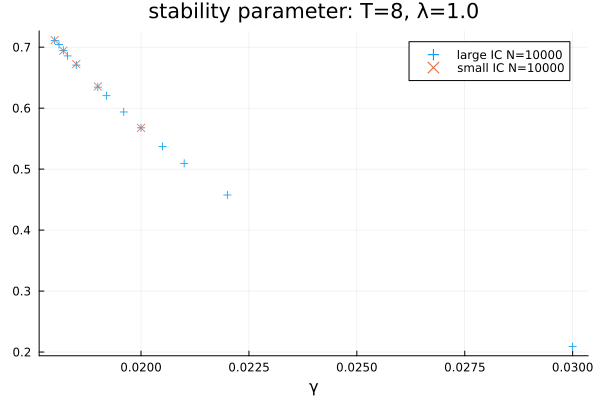

In [13]:
scatter!(pfits, GAM_range_101, res_fit_101, label="small IC N="*string(N), markershape=:x, markerstrokewidth=1, markersize = 4)
#scatter!(pfits, GAM_range_101, res_geomean_101, label="geo2 N="*string(N), markershape=:x, markerstrokewidth=2, markersize = 4)

In [17]:
#savefig(pfits, "checkIC_T"*string(T)*"_LAM"*string(LAM)*".pdf")

"/home/louise/Documents/PostDoc_Turin/Projet-Epidemics/Epidemble/Git/Epidemble_local_copy/checkIC_T8_LAM1.0.pdf"

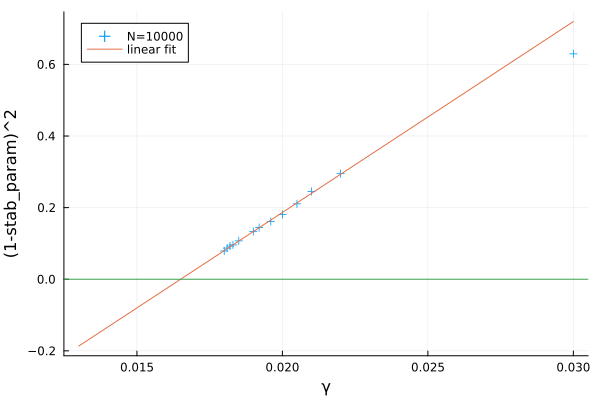

In [14]:
fitrange = 0.013:0.001:0.03

#fit a_s*(x-c_s)
a_s             = 53.308           #+/- 0.7836       (1.47%)
c_s             = 0.0165002        #+/- 4.744e-05    (0.2875%)
pfs=plot(yaxis="(1-stab_param)^2",xaxis="γ")
scatter!(pfs, GAM_range, (1.0 .-res_geomean).^2, label="N="*string(N), markershape=:+)
plot!(pfs, fitrange, a_s.*(fitrange.-c_s), label="linear fit")
hline!(pfs, [0], label="")

In [15]:
#fit lin a_l*x+b_l
a_l             = 77.1548          #+/- 1.094        (1.418%)
c_l             = 0.0142685        #+/- 6.099e-05    (0.4275%)
#fit quad a_q*(x**2)+b_q*x+c_q
a_q             = -3440.57         #+/- 662.6        (19.26%)
b_q             = 201.457          #+/- 26.36        (13.09%)
c_q             = -2.22298         #+/- 0.2613       (11.76%)
#find zeros
disc=b_q^2-4*a_q*c_q
sol1, sol2 = (-b_q-sqrt(disc))/(2*a_q), (-b_q+sqrt(disc))/(2*a_q)

(0.04380309651501429, 0.014750282721565694)

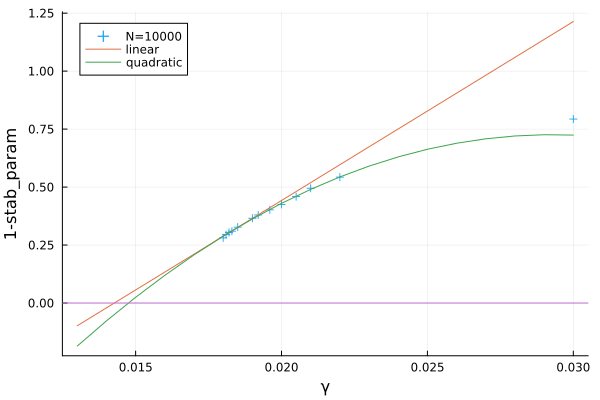

In [16]:
pflq=plot(yaxis="1-stab_param",xaxis="γ")
scatter!(pflq, GAM_range, (1.0 .-res_geomean), label="N="*string(N), markershape=:+)
plot!(pflq, fitrange, a_l.*(fitrange.-c_l), label="linear")
plot!(pflq, fitrange, a_q.*(fitrange.^2).+b_q.*fitrange.+c_q, label="quadratic")
hline!(pflq, [0], label="")

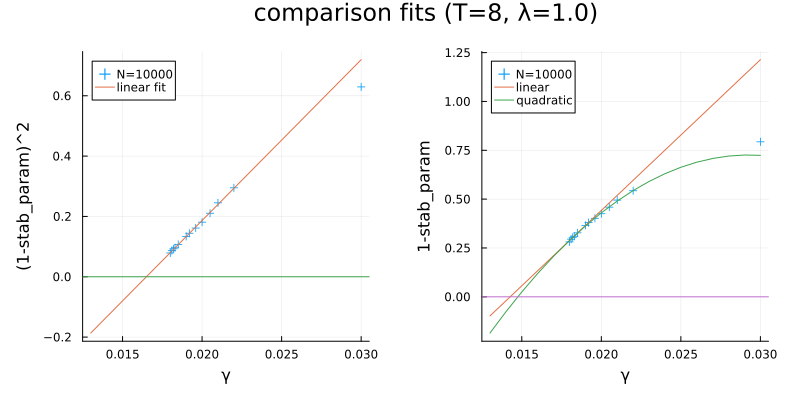

In [17]:
plot(pfs, pflq, size=(800,400), margin=6*Plots.mm, plot_title="comparison fits (T="*string(T)*", λ="*string(LAM)*")")

In [18]:
#savefig("fit_stability_parameter_T"*string(T)*"_LAM"*string(LAM)*".pdf")

# size study at γ=0.0182

"tmp_stab/res_epid_stab/gam0.0183/"

In [115]:
T=8
LAM=1.0
GAM=0.0183
path = "tmp_stab/res_epid_stab/gam"*string(GAM)*"/"
iter=500
N_range=[50000]#[5000, 10000, 50000, 100000]
#runs_range = 1:10
runs_range = 101:110

101:110

In [116]:
gam_res = zeros(length(N_range), length(runs_range));
err_res = zeros(length(N_range), length(runs_range));
list_AUC = []
list_pla = []
list_inf = [];

In [117]:
for isiz in 1:length(N_range)
    for irun in 1:length(runs_range)
        run=runs_range[irun]
        N=N_range[isiz]

        nameparams = "_T"*string(T)*"_LAM"*string(LAM)*"_GAM"*string(GAM)*"_N"*string(N)*"_iter"*string(iter)
        extension = "_run"
        namefile = path*"fileres_epid_stab"*nameparams*extension*string(run)
        nameobs =  path*"obs_epid_stab"*nameparams*extension*string(run)

        file = readdlm(namefile);
        fobs = readdlm(nameobs);

        res = file[3:end,1:4]
        iter_full=findall(.!isnan.(res[:,1]))
        halfiter=Int64(iter/2)+2
        iter_Δ = findall([(!isinf(res[j,4])&&!isnan(res[j,4])) for j in iter_full])

        if res[iter_Δ[end],4] < 1
            #geometrical mean
            ratio_Δ = [abs(res[i,4]/res[i-1,4]) for i in iter_Δ[halfiter:end]]
            frac_cut = 3
            lsta = Int64(round(length(ratio_Δ)/frac_cut))
            lend = length(ratio_Δ)-lsta
            gmΔ = prod(ratio_Δ[lsta:lend])^(1/length(lsta:lend))        
            #linear fit
            log_Δ = log.(res[iter_Δ[halfiter:end],4])
            log_Δ_cut = log_Δ[lsta:lend]
            (a,b)=linear_fit(lsta:lend, log_Δ_cut)
            sfitΔ = exp(b)
        else
            gmΔ=Inf
            sfitΔ=Inf
        end
        
        err=res[end-1,2]
        err_res[isiz,irun]=err
        #@show N, run, err
        
        gam_res[isiz,irun]=sfitΔ

        res_obs = fobs[3:end,:]
        half_obs = 3*Int64(round(size(res_obs)[1]/6))
        end_obs = size(res_obs)[1]
        half_obs, end_obs
        inds_AUC=[mod(i,3) == 0 && i>half_obs for i in 1:end_obs]
        inds_pla=[mod(i,3) == 1 && i>half_obs for i in 1:end_obs]
        inds_inf=[mod(i,3) == 2 && i>half_obs for i in 1:end_obs];
        mean_AUC = mean(res_obs[inds_AUC,2:end], dims=1)[1,:]
        std_AUC = std(res_obs[inds_AUC,2:end], dims=1)[1,:]
        mean_inf = mean(res_obs[inds_inf,2:end], dims=1)[1,:]
        std_inf = std(res_obs[inds_inf,2:end], dims=1)[1,:]
        mean_pla = mean(res_obs[inds_pla,2:end], dims=1)[1,:]
        std_pla = std(res_obs[inds_pla,2:end], dims=1)[1,:];
        
        push!(list_AUC, [N_range[isiz], run, mean_AUC, std_AUC])
        push!(list_pla, [N_range[isiz], run, mean_pla, std_pla])
        push!(list_inf, [N_range[isiz], run, mean_inf, std_inf]);
    end
end

In [118]:
for isiz in 1:length(N_range)
    N=N_range[isiz]
    mean_err=mean(err_res[isiz,:])
    std_err=std(err_res[isiz,:])
    @show isiz, mean_err, std_err
end

(isiz, mean_err, std_err) = (1, 0.0021005409551262725, 0.001125647358823169)


In [119]:
permutedims(err_res)

10×1 Matrix{Float64}:
 0.0010373342430924954
 0.00020325535070940456
 0.003593673246493831
 0.001200210980266288
 0.0023497394136881796
 0.0016696256379939243
 0.00382765474634851
 0.0022853807501605544
 0.0021315615865118457
 0.0027069735959976914

In [120]:
permutedims(gam_res)

10×1 Matrix{Float64}:
 0.6877926118795379
 0.6870552337269971
 0.6877823695440123
 0.6877601171844828
 0.689029758828363
 0.6862824271188747
 0.6878629966517523
 0.7031283617781342
 0.6877000973997921
 0.6881358859816059

In [103]:
frac_conv = sum(.!isinf.(gam_res), dims=2)./length(runs_range)
mean_stab = zeros(length(N_range))
std_stab = zeros(length(N_range));
for isiz in 1:length(N_range)
    N=N_range[isiz]
    indicesconv=.!isinf.(gam_res[isiz,:])
    mean_stab[isiz]=mean(gam_res[isiz,indicesconv])
    std_stab[isiz]=std(gam_res[isiz,indicesconv])
end

In [104]:
hcat(mean_stab,std_stab)

1×2 Matrix{Float64}:
 0.703807  0.000920449

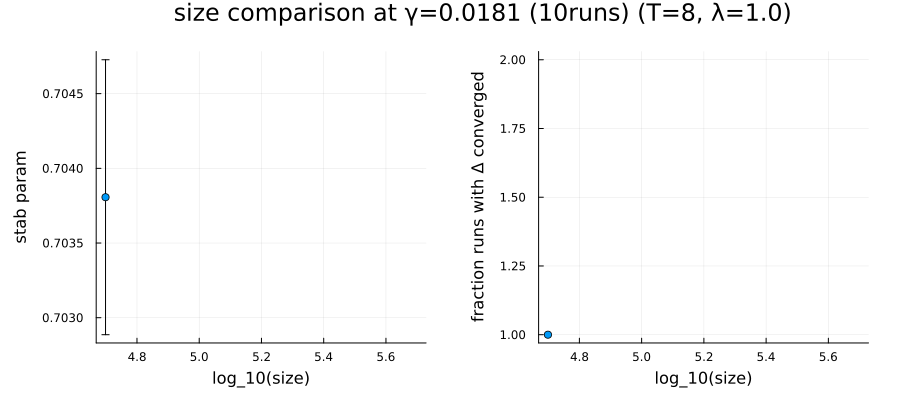

In [105]:
pstab=plot(yaxis="stab param", xaxis="log_10(size)")
scatter!(pstab,log.(N_range)./log(10),mean_stab, yerr=std_stab, label="");
pconv=plot(yaxis="fraction runs with Δ converged", xaxis="log_10(size)")
scatter!(pconv, log.(N_range)./log(10),frac_conv, label="");
pTIT="size comparison at γ="*string(GAM)*" (10runs) (T="*string(T)*", λ="*string(LAM)*")"
plot(pstab, pconv, size=(900,400), margin=6*Plots.mm, plot_title=pTIT)

In [30]:
#savefig("sizestudy_stability_parameter_T"*string(T)*"_LAM"*string(LAM)*"_γ"*string(GAM)*".pdf")

In [31]:
isinf.(gam_res)

4×10 BitMatrix:
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  1  0  0
 0  0  0  0  0  0  0  0  0  0

In [33]:
iconv=22
idiv=28;

In [34]:
pAUC = plot(xaxis="epid time", yaxis="AUC")
scatter!(pAUC, 1:(T+1), list_AUC[iconv][3], yerr=list_AUC[iconv][4], label="Δ converged", markerstrokecolor = :auto)
scatter!(pAUC, 1:(T+1), list_AUC[idiv][3], yerr=list_AUC[idiv][4], label="Δ diverged", markerstrokecolor = :auto);

In [35]:
ppla = plot(xaxis="epid time", yaxis="planted marg")
scatter!(ppla, 1:(T+1), list_pla[iconv][3], yerr=list_pla[iconv][4], label="Δ converged", markerstrokecolor = :auto)
scatter!(ppla, 1:(T+1), list_pla[idiv][3], yerr=list_pla[idiv][4], label="Δ diverged", markerstrokecolor = :auto);

In [36]:
pinf = plot(xaxis="epid time", yaxis="inferred marg")
scatter!(pinf, 1:(T+1), list_inf[iconv][3], yerr=list_inf[iconv][4], label="Δ converged", markerstrokecolor = :auto)
scatter!(pinf, 1:(T+1), list_inf[idiv][3], yerr=list_inf[idiv][4], label="Δ diverged", markerstrokecolor = :auto);

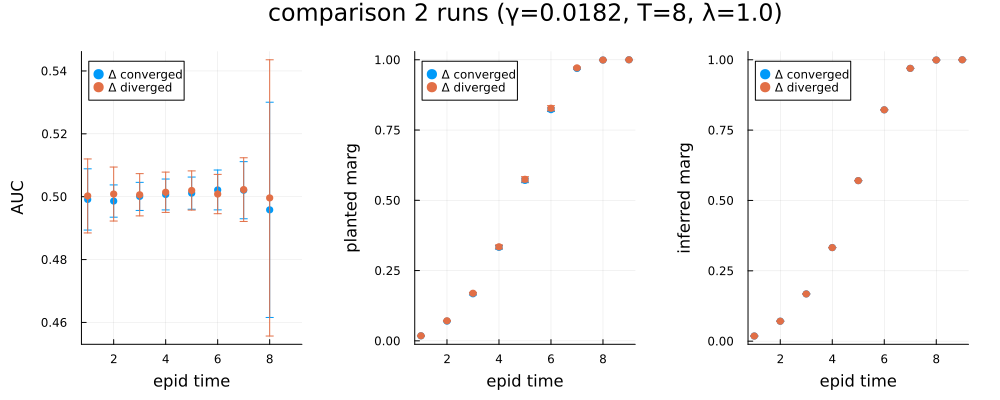

In [37]:
TIT="comparison 2 runs (γ="*string(GAM)*", T="*string(T)*", λ="*string(LAM)*")"
plot(pAUC, ppla, pinf, size=(1000,400), layout=(1,3), margin=6*Plots.mm, plot_title=TIT)

In [38]:
#savefig("observables_divconvstability_T"*string(T)*"_LAM"*string(LAM)*"_γ"*string(GAM)*".pdf")